# 1141_社會資料分析 作業二
姓名：劉晏成

## 題目
以「2018台北大學社會系三鶯調查」（brilliant_working.sav）檔案回答下列問題：
1. 計算環境行為（c1）總分的集中量數（平均數、中位數、眾數）和變異量數（全距、四分位差、標準差）
2. 分別計算個人收入（b1）的百分等級和Z分數，並比較原始分數、百分等級、Z分數三者的偏態

In [1]:
from load import load_sav

df = load_sav("../data/brilliant_working.sav")

In [2]:
variable_value_labels = df.attrs['variable_value_labels']
column_names = df.attrs['column_names']
column_names_to_labels = df.attrs['column_names_to_labels']

## Q1: 計算環境行為（c1）總分的集中量數（平均數、中位數、眾數）和變異量數（全距、四分位差、標準差）

In [3]:
df_1 = df[['c1a', 'c1b', 'c1c', 'c1d', 'c1e', 'c1f', 'c1g']].copy()

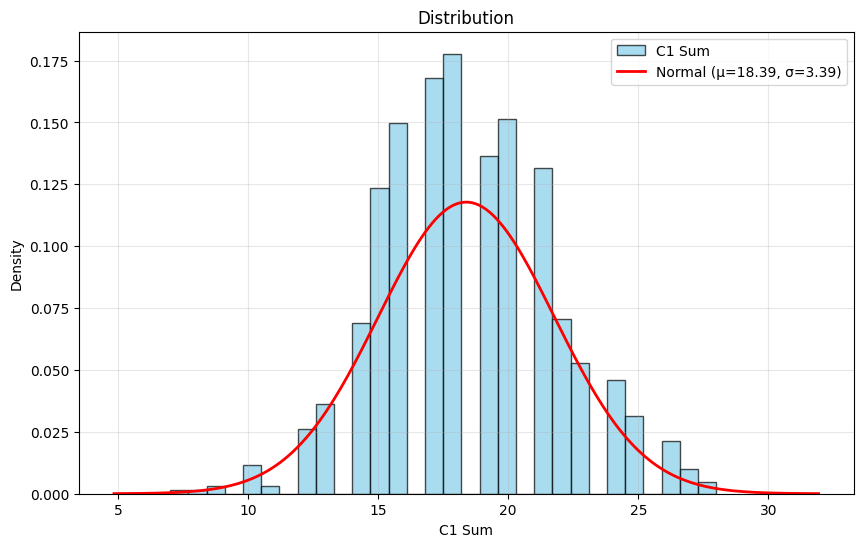

In [10]:
df_1.loc[:, 'c1_sum'] = df_1[['c1a', 'c1b', 'c1c', 'c1d', 'c1e', 'c1f', 'c1g']].sum(axis=1)

from plot.distribution import distribution_plot
distribution_plot(df_1.loc[:, 'c1_sum'], xlabel = 'C1 Sum')

In [5]:
df_1_describe = df_1['c1_sum'].describe()
mean = df_1_describe['mean']
std = df_1_describe['std']
median = df_1_describe['50%']
_min = df_1_describe['min']
_max = df_1_describe['max']
q1 = df_1_describe['25%']
q3 = df_1_describe['75%']
mode = df_1.loc[:, 'c1_sum'].mode()[0]

### Answers

In [6]:
import pandas as pd

answer = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode', 'Range', 'Q1', 'Q3', 'Standard Deviation'],
    'Value': [mean, median, mode, _max - _min, q1, q3, std]
})

answer.style.hide(axis='index')

Statistic,Value
Mean,18.387097
Median,18.000000
Mode,18.000000
Range,21.000000
Q1,16.000000
Q3,21.000000
Standard Deviation,3.388347


## Q2: 分別計算個人收入（b1）的百分等級和Z分數，並比較原始分數、百分等級、Z分數三者的偏態

In [7]:
df_2 = df[['b1']].copy().rename(columns = { 'b1': 'income' })

### Filter out '拒答'(997.0), '漏答'(998.0), '不適用'(999.0), and nullish rows from dataset

In [8]:
df_2_clean = df_2[
    (df_2['income'].notna()) & 
    (~df_2['income'].isin([997.0, 998.0, 999.0]))
]
df_2_clean.value_counts().sort_index()

income
0.0       139
1.0        29
2.0        68
3.0       137
4.0       201
5.0        96
6.0        74
7.0        25
8.0        27
9.0         8
10.0       19
11.0       12
12.0        1
13.0        4
15.0       24
Name: count, dtype: int64

### Plot the distribution histogram

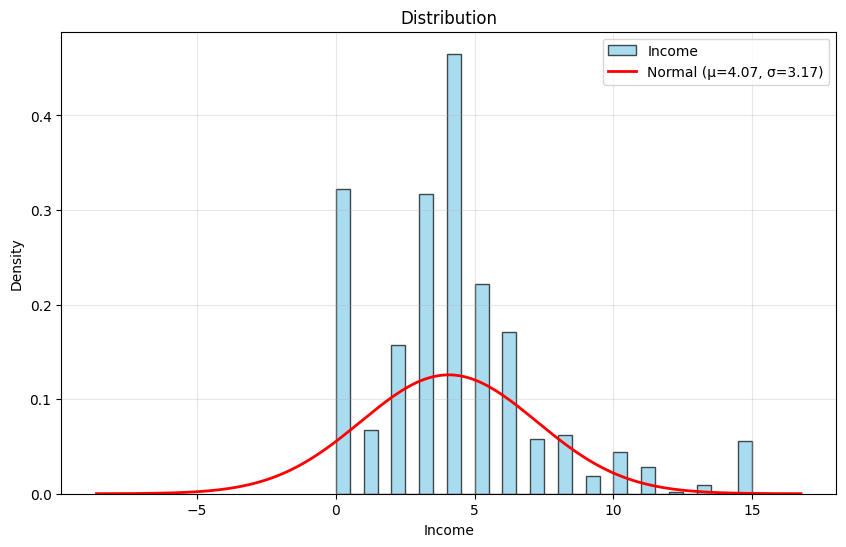

In [9]:
from plot.distribution import distribution_plot
distribution_plot(df_2_clean['income'], xlabel = 'Income')